<font size="48">Entwicklung eines Naive Bayes Klassifikator</font>

<h5>Digitalisierung 5 Markus Deli</h5>

Zunächst einmal machen wir die ersten Imports um unsere Daten wir zu verarbeiten, danach laden wir alle notwendigen Restinhalte herunter.

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import nltk 

In [ ]:
import re

In [ ]:
from nltk.corpus import stopwords

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

Nun bereiten wir den Data Frame vor. Hierzu lesen wir die CSV Datei 'IMDB Dataset.csv' ein. Die Datei enthält 50000 IMDB Filmreviews, 
<br>welche von 'https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews' stammt.<br> Es gibt insgesamt zwei Spalten, eine mit den Reviews und eine mit dem Tag ob das Review
positiv oder negativ ist. 


In [ ]:
column = ["text", "tag"]
data = pd.read_csv("IMDB Dataset.csv", names=column)
data = data.drop([0,])

So sieht der Data Frame gerade aus:

In [ ]:
data.head()

,text,tag
1,One of the other reviewers has mentioned that ...,positive
2,A wonderful little production. <br /><br />The...,positive
3,I thought this was a wonderful way to spend ti...,positive
4,Basically there's a family where a little boy ...,negative
5,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Da der Dataframe noch recht unaufgeräumt ist und scheinbar noch HTML Tags enthält wird er erstmals aufgeräumt. 

In [ ]:
from nltk.tokenize import word_tokenize

Zunächst einmal wird eine Preprocess Funktion erstellt. <br>Dieser kann man den zu verändernden String übergeben sowie eine boolsche Variable ob zusätzlich noch Stopwords entfernt werden sollen.
<br>Die Funktion entfernt zuerst alle nicht Chars aus dem String die keine Buchstaben sind, dann alle Wörter die aus weniger als drei buchstaben bestehen <br>und dann noch alle überschüssigen Leerzeichen.
Wenn Stopwords entfernt werden, wird zunächst jedes Review tokenisiert und dann werden alle Stopwords entfernt. <br>Wichtig ist hier dass die Stopwords in  ein Caches Set gespeichert werden da so die Laufzeit um das ca 300 fache kürzer ist,<br> als gegenüber des Aufrufs über '[word for word in text_tokens if word not in stopwords.words("english")]' Somit kann der Datensatz stark entrauscht werden.

In [ ]:
cache = set(stopwords.words("english"))

def preprocess_string(str_arg, stopword):
    clean=re.sub('[^a-z\s]+',' ',str_arg,flags=re.IGNORECASE)
    clean=re.sub(r'\b\w{1,2}\b', '', clean)
    clean=re.sub('(\s+)',' ',clean)
    clean=clean.lower()
    if stopword == True:        
        text_tokens = word_tokenize(clean)
        tokens_without_stop_words = [word for word in text_tokens if word not in cache]
        clean =  (" ").join(tokens_without_stop_words)
    return clean 

Nun noch die Funktion ohne Stopword Removal auf dem Data Frame anwenden:

In [ ]:
count = 0
liste = []
tmp = np.array(data['text'])
for element in tmp:
    liste.append(tmp[count])
    liste[count] = preprocess_string(tmp[count], False)
    count += 1

So sehen die Reviews jetzt aus:

In [ ]:
print(liste[0])

one the other reviewers has mentioned that after watching just episode you hooked they are right this exactly what happened with the first thing that struck about was its brutality and unflinching scenes violence which set right from the word trust this not show for the faint hearted timid this show pulls punches with regards drugs sex violence its hardcore the classic use the word called that the nickname given the oswald maximum security state penitentary focuses mainly emerald city experimental section the prison where all the cells have glass fronts and face inwards privacy not high the agenda city home many aryans muslims gangstas latinos christians italians irish and more scuffles death stares dodgy dealings and shady agreements are never far away would say the main appeal the show due the fact that goes where other shows wouldn dare forget pretty pictures painted for mainstream audiences forget charm forget romance doesn mess around the first episode ever saw struck nasty was su

Natürlich wollen wir auch Lemmatisieren! Deshalb machen wir die nötigen Imports:

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

Da der Lemmatizer POS-tags unterstützt, nutzten wir dieses Feature in der Hoffnung dass das Lemmatisieren so noch besser klappt!(das tut es auch).<br> Deshalb erstellen wir eine Funktion die uns die nötigen Wortarten liefert:

In [ ]:
def nltk_to_wordnet_tag(nltk_tag):
  if nltk_tag.startswith('N'):
    return wordnet.NOUN
  elif nltk_tag.startswith('V'):
    return wordnet.VERB
  elif nltk_tag.startswith('J'):
    return wordnet.ADJ
  elif nltk_tag.startswith('R'):
    return wordnet.ADV
  else:                    
    return None

*Noch* den Lemmatizer initalisieren:

In [ ]:
lemmatizer = WordNetLemmatizer()

Jetzt die Funktion zum Lemmatisieren. Dazu mappen wir die POS tags mit Hilfe der obigen Funktion, sodass iterativ mit Hilfe der Tags(sofern vorhanden) lemmatisiert werden kann.

In [ ]:
def lemmatize_sentence(sentence):
  nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))    
  tagged = map(lambda x: (x[0], nltk_to_wordnet_tag(x[1])), nltk_tagged)

  words = []
  for word, tag in tagged:
    if tag is None:                        
      words.append(word)
    else:
      words.append(lemmatizer.lemmatize(word, tag))

  return " ".join(words)

Nun die Lemmatisierung:

In [ ]:
count = 0
tmp = liste
liste = []
for element in tmp:
    review = tmp[count]
    liste.append(lemmatize_sentence(review))
    count+=1

So sehen die Reviews jetzt aus:

In [ ]:
print(liste[0])

one the other reviewer have mention that after watch just episode you hook they be right this exactly what happen with the first thing that strike about be its brutality and unflinching scene violence which set right from the word trust this not show for the faint hearted timid this show pull punch with regard drug sex violence its hardcore the classic use the word call that the nickname give the oswald maximum security state penitentary focus mainly emerald city experimental section the prison where all the cell have glass front and face inwards privacy not high the agenda city home many aryan muslim gangstas latinos christian italian irish and more scuffle death stare dodgy dealing and shady agreement be never far away would say the main appeal the show due the fact that go where other show wouldn dare forget pretty picture paint for mainstream audience forget charm forget romance doesn mess around the first episode ever saw struck nasty be surreal couldn say be ready for but watch m

Da wir durch das Lemmatisieren jetzt wieder Wörter mit weniger als drei Buchstaben in den Reviews haben entfernen wir diese. <br>Außerdem entferne wir jetzt auch noch die Stopwords. Diese entfernen wir deshalb,da wir annehmen das diese keinen Mehrwert liefern.

In [ ]:
count = 0
liste_without_stopwords = []
for element in liste:
    liste_without_stopwords.append(liste[count])
    liste_without_stopwords[count] = preprocess_string(liste[count], True)
    count += 1

Fast fertig mit dem Preprocessing! Nun teilen wir die Daten noch in Reviews(X-Achse) und Tags(Y-Achse) auf.

In [ ]:
X_all = np.array(liste_without_stopwords)
Y_all = np.array(data['tag'])

Natürlich brauchen wir neben Trainingsdaten, auch Testdaten um den Klassifikator zu validieren!<br> Deshalb importieren aus Sklearn den train_test_split.

In [ ]:
from sklearn.model_selection import train_test_split

Nun teilen wir unsere Daten nach einem 90/10 Percentag Split. Dabei heben wir uns 10% der Daten zum Testen auf.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size=0.1, random_state=42)

Da unsere Daten noch in Textform vorliegen, brauchen wir einen Vectorizer um die Reviews als Vektoren dar zu stellen. <br>Dazu verwenden wir den Tfidf Vectorizer aus Sklearn.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

Der TfidfVectorizer berechnet auch die Tfidf Weights, dabei hat betrachtet er die Reviews als Uni-gramme.
Wir speichern die vectorisierten Dokumente als Train- bzw. Testfeatures.

In [ ]:
vectorizer = TfidfVectorizer()
train_features = vectorizer.fit_transform(X_train.ravel())
test_features = vectorizer.transform(X_test.ravel())

Nun geht es an den Klassifikator. Hier verwenden wir den Multinomialen Naive Bayes von Sklearn. Wir verwenden Multinomialen Naive Bayes, da dieser besonders gut für die Klassifizierung mit diskreten Merkmalen geeignet ist.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

Jetzt fitten wir den Klassifikator mit den Trainingsdaten.

In [ ]:
classifier = MultinomialNB()
classifier.fit(train_features, Y_train.astype('str'))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Selbstverständlich wollen wir noch wissen wie gut unser Klassifikator ist! 

In [ ]:
from sklearn.metrics import accuracy_score

Dazu lassen wir uns die Accuracy der Testdaten ausgeben:

In [ ]:
accuracy_test = accuracy_score(Y_test.astype('str'), classifier.predict(test_features), normalize = True) * float(100)

print("Die Accuracy der Testvorhersage in % beträgt:", accuracy_test)

Die Accuracy der Testvorhersage in % beträgt: 86.56


Das ist doch schon gar nicht mal so schlecht! Doch unser vectorizer und classifier haben doch noch Parameter die optimiert werden können!
<br>Versuchen wir diese doch noch zu verwenden. Das machen wir aus der Annahme heraus, das davon aus zu gehen ist, dass Wörter einzeln betrachtet weniger Information liefert, als diese als N-Gramme zu betrachten.

<br>Zunächst einmal verwenden wir nun ein N-gram anstatt einem Unigram, in unserem vectorizer.
<br>Die N-gram range geht von Uni-gram bis 4-gram, dieser Wert wurde iterativ mittels Trial and Error bestimmt.

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,4))
train_features = vectorizer.fit_transform(X_train.ravel())
test_features = vectorizer.transform(X_test.ravel())

Für den Alpha Paramater, welcher den additiven smoothing Parameter repräsentiert, verwenden wir 0.015. Der Wert wurde ebenfalls mittels 
Trial and Error iterativ bestimmt.

In [ ]:
classifier = MultinomialNB(alpha = 0.015)
classifier.fit(train_features, Y_train.astype('str'))

MultinomialNB(alpha=0.015, class_prior=None, fit_prior=True)

So und jetzt noch einmal die neue Accuracy bestimmen:

In [ ]:
accuracy_test = accuracy_score(Y_test.astype('str'), classifier.predict(test_features), normalize = True) * float(100)

print("Die Accuracy der Testvorhersage in % beträgt:", accuracy_test)

Die Accuracy der Testvorhersage in % beträgt: 89.36


Da ging ja doch noch einiges!

<br>
<br>Doch nun könnte man die Annahme treffen, dass durch die N-Gramme die entfernung der Stopwords gar nicht so hilfreich war! Es kann ja sein, dass dass die Stopwords wichtige bestandteile des N-Gramms sind. Das gilt es zu prüfen.<br> Deshalb Klassifizieren wir erneut, verwenden aber die Daten denen die Stopwords nicht entfernt wurden. Mal sehen ob es noch genauer wird.

In [ ]:
X_all = np.array(liste)
X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size=0.1, random_state=42)
vectorizer = TfidfVectorizer(ngram_range=(1,4))
train_features = vectorizer.fit_transform(X_train.ravel())
test_features = vectorizer.transform(X_test.ravel())
classifier = MultinomialNB(alpha = 0.0157)
classifier.fit(train_features, Y_train.astype('str'))
accuracy_test = accuracy_score(Y_test.astype('str'), classifier.predict(test_features), normalize = True) * float(100)
print("Die Accuracy der Testvorhersage in % beträgt:", accuracy_test)

Die Accuracy der Testvorhersage in % beträgt: 90.62


Wie vermutet ist die Accuracy erneut gestiegen! Nun wollen wir auch noch die Precision, Recall und den F1 Score des Klassifikator bestimmen.
<br>Dazu erstellen wir eine Confusion Matrix an der wir die "True Positives" "False Positives" "True Negatives" "False Negatives" ablesen können.

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()


cm_test = confusion_matrix(Y_test,classifier.predict(test_features))
sns.heatmap(cm_test,annot=True,fmt='d',linewidths=.5, cmap="YlGnBu")

Auch noch die Gesamt Negativen/Positiven bestimmen:

In [ ]:
tn=2252;fn=229;fp=240;tp=2279;
n=tn+fp
p=fn+tp
print("total negatives %d"%(n))
print("total positive %d"%(p))

total negatives 2492
total positive 2508


Jetzt berechnen wir die Precison, den Recall sowie den F1-Score:

In [ ]:
precision=tp/(tp+fp)
print("Precision",precision)
recall = tp/p
print("Recall",recall)
f1 = 2*((precision*recall)/(precision+recall))
print("f1-score",f1)

Precision 0.9047240968638348
Recall 0.9086921850079744
f1-score 0.906703799482793


Schauen wir noch was die häufigsten Negativen/Positiven Wörter sind, und mit welcher bedingten Wahrscheinlichkeit diese Auftreten.

In [ ]:
count=0
all_positive_words=[] 
all_negative_words=[]
for sent in X_all:
    tmp = X_all[count].split()
    count2 = 0
    for w in tmp:
        if Y_all[count] == "positive": 
            all_positive_words.append(tmp[count2]) 
        if Y_all[count] == "negative":
            all_negative_words.append(tmp[count2])
        count2+=1
    count+=1

In [ ]:
test = pd.DataFrame(all_positive_words)
test.head()

,0
0,one
1,the
2,other
3,reviewer
4,have


Wir ziehen jetzt ein Random Sample aus den Wörtern der Trainingsdaten:

In [ ]:
import random

In [ ]:
all_positive_words = random.sample(all_positive_words, 10000)
all_negative_words = random.sample(all_negative_words, 10000)

Wir zählen auch wie oft jedes Wort in dem Sample vorkommt:

In [ ]:
freq_negative_words = {x:all_negative_words.count(x) for x in all_negative_words}

In [ ]:
freq_positive_words = {x:all_positive_words.count(x) for x in all_positive_words}

Nun berechnen wir die Wahrscheinlichkeiten der Wörter aus den positiven Reviews:

In [ ]:
tmp=[]
for key in freq_positive_words:
    prob = freq_positive_words[key]/len(all_positive_words)
    tmp.append([key,prob])
table_positive = pd.DataFrame(tmp,columns=['positive_words','probability'])

In [ ]:
table_positive = table_positive.sort_values('probability', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

Jetzt lassen wir uns noch die 15 Wahrscheinlichsten Wörter ausgeben:

In [ ]:
table_positive.head(15)

,positive_words,probability
12,the,0.0779
20,and,0.0399
15,be,0.0227
52,that,0.0159
59,this,0.0150
104,have,0.0129
97,film,0.0124
56,for,0.0116
62,with,0.0106
65,you,0.0096


Das selbe auch noch mit den Wörtern aus den negativen Reviews:

In [ ]:
tmp=[]
for key in freq_negative_words:
    prob = freq_negative_words[key]/len(all_negative_words)
    tmp.append([key,prob])
table_negative = pd.DataFrame(tmp,columns=['negative_words','probability'])

In [ ]:
table_negative = table_negative.sort_values('probability', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

In [ ]:
table_negative.head(15)

,negative_words,probability
3,the,0.0725
40,and,0.0335
52,be,0.0261
67,this,0.0188
81,that,0.0153
12,have,0.0149
1,movie,0.0149
25,for,0.0101
62,film,0.0088
100,but,0.0086


Da sind ja einige Stopwords unter den Top 15 dabei... <br> Machen wir das neu, verwenden aber die Reviews denen die Stopwords entfernt wurden.

In [ ]:
X_all = np.array(liste_without_stopwords)#ohne stopwords
count=0
all_positive_words=[] 
all_negative_words=[]
for sent in X_all:
    tmp = X_all[count].split()
    count2 = 0
    for w in tmp:
        if Y_all[count] == "positive": 
            all_positive_words.append(tmp[count2]) 
        if Y_all[count] == "negative":
            all_negative_words.append(tmp[count2])
        count2+=1
    count+=1
all_positive_words = random.sample(all_positive_words, 10000)
all_negative_words = random.sample(all_negative_words, 10000)
freq_negative_words = {x:all_negative_words.count(x) for x in all_negative_words}
freq_positive_words = {x:all_positive_words.count(x) for x in all_positive_words}
tmp=[]
for key in freq_positive_words:
    prob = freq_positive_words[key]/len(all_positive_words)
    tmp.append([key,prob])
table_positive = pd.DataFrame(tmp,columns=['positive_words','probability'])
table_positive = table_positive.sort_values('probability', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')
table_positive.head(15)

,positive_words,probability
112,film,0.0151
64,movie,0.0128
191,one,0.0078
16,make,0.0078
31,see,0.0077
102,time,0.0061
39,good,0.0061
170,like,0.0061
82,well,0.0055
316,story,0.0050


In [ ]:
tmp=[]
for key in freq_negative_words:
    prob = freq_negative_words[key]/len(all_negative_words)
    tmp.append([key,prob])
table_negative = pd.DataFrame(tmp,columns=['negative_words','probability'])
table_negative = table_negative.sort_values('probability', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')
table_negative.head(15)

,negative_words,probability
174,movie,0.0216
124,film,0.0160
21,one,0.0109
147,like,0.0096
86,make,0.0079
4,bad,0.0069
258,get,0.0066
63,character,0.0062
25,see,0.0062
31,good,0.0058


Die Wörter sind doch deutlich interessanter. 
<br>
<br>Zu guter letzt plotten wir noch die Top Worter mit ihrer Häufigkeit.

In [ ]:
from operator import itemgetter

In [ ]:
negatives={}
i=0
for key, value in sorted(freq_negative_words.items(), key = itemgetter(1), reverse = True):
    if(i>10):
        break
    negatives[key]=value
    i+=1

In [ ]:
positives={}
i=0
for key, value in sorted(freq_positive_words.items(), key = itemgetter(1), reverse = True):
    if(i>10):
        break
    positives[key]=value
    i+=1

In [ ]:
import matplotlib.pyplot as plt

Barplot for most frequent words in negative reviews


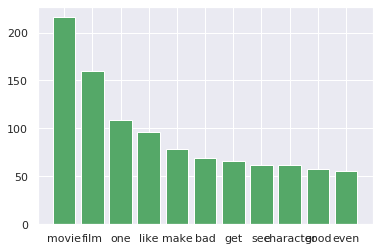

In [ ]:
plt.bar(range(len(negatives)), list(negatives.values()), align='center', color ='g')
plt.xticks(range(len(negatives)), list(negatives.keys()))

print("Barplot for most frequent words in negative reviews")
plt.show()

Barplot for most frequent words in positive reviews


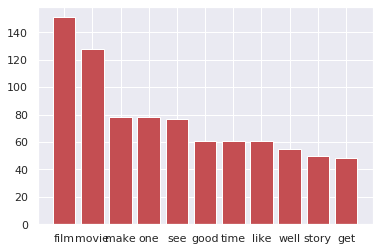

In [ ]:
plt.bar(range(len(positives)), list(positives.values()), align='center', color = 'r')
plt.xticks(range(len(positives)), list(positives.keys()))

print("Barplot for most frequent words in positive reviews")
plt.show()

Interessanterweise sind die Häufigsten Wörter in den positiven als auch den negativen Reviews sehr ähnlich und dennoch hat die Klassifikation herausragend funktioniert. Dies ist jedoch aber auch der Grunde weshalb Tf-idf benutzt wurde, da dieses Problem so gelöst wird.

Ok, vielleicht doch noch eine Visualisierung.. Schauen wir uns die Precision, Recall und F1 unserer drei Klassifikatoren an:

In [ ]:
tn1=2252;fn1=229;fp1=240;tp1=2279;
p1=fn1+tp1

In [ ]:
tn2=2171;fn2=310;fp2=362;tp2=2157;
p2=fn2+tp2

In [ ]:
tn3=2214;fn3=267;fp3=265;tp3=2254;
p3=fn3+tp3

In [ ]:
precision1=tp1/(tp1+fp1)
recall1 = tp1/p1
f1_1 = 2*((precision1*recall1)/(precision1+recall1))

In [ ]:
precision2=tp2/(tp2+fp2)
recall2 = tp2/p2
f1_2 = 2*((precision2*recall2)/(precision2+recall2))

In [ ]:
precision3=tp3/(tp3+fp3)
recall3 = tp3/p3
f1_3 = 2*((precision3*recall3)/(precision3+recall3))

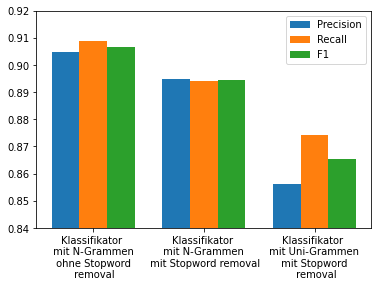

In [ ]:
precision = [precision1, precision3, precision2]
recall = [recall1, recall3, recall2]
f1 = [f1_1, f1_3, f1_2]
x = np.arange(3) 
width = 0.25 
fig, ax = plt.subplots()
ax.bar(x - width, precision, width, label='Precision')
ax.bar(x , recall, width, label='Recall')
ax.bar(x + width, f1, width, label='F1')
ax.legend()
plt.xticks(x, ('Klassifikator \n mit N-Grammen \n ohne Stopword \n removal','Klassifikator \n mit N-Grammen \n mit Stopword removal','Klassifikator \n mit Uni-Grammen \n mit Stopword \n removal'))
plt.ylim(0.84, 0.92)
plt.show()

TypeError: object of type 'int' has no len()